# Churn Analysis
The objective of this case study is to use a classification-based model to predict the Churn.

# Content

* [1. Introduction](#2)
* [2. Business Understanding](#3)
* [3. Data Understanding](#4)
    * [3.1 Load Libraries](#4.1)    
    * [3.2. Load Dataset](#4.2)
    * [3.3. Exploratory Data Analysis (EDA)](#4.3)
    * [3.4. Descriptive Statistics](#4.4)
    * [3.5. Data Visualisation](#4.5)
* [4. Data Preparation](#5)
* [5. Modeling](#6)
    * [5.1 Train / Test Split](#6.1) 
    * [5.2.Linear Regression Model](#6.2) 
* [6.Data Preparation ARIMA Model](#7)        
    * [6.1. Stationary Time Series](#7.1)
    * [6.2. Checks for Stationarity](#7.2)
        * [6.2.1. Summary Statistics](#7.2.1)
        * [6.2.2. Augmented Dickey-Fuller test](#7.2.2)
    * [6.3. Use and Remove Trends](#7.3)
* [7. ARIMA Model](#8)
    * [7.1. Hyperparameters for ARIMA model](#8.1)
* [8. Comparision Linear Regression vs ARIMA](#9)
* [9. References](#10) 

<a id='2'></a>
# 1. Introduction 

<a id='3'></a>
# 2. Business Understanding

<a id='4'></a>
# 3. Data Understanding

### Data dictionary 

- **customerID:** Unique identifier for each customer. It might not be very useful for predictive analysis but is essential for identifying records.
- **gender:** Customer's gender. It's a categorical variable that could influence churn.
- **SeniorCitizen:** Indicates whether the customer is a senior citizen (possibly a binary 0/1 value). It's important to analyze how age affects customer loyalty.
- **Partner:** Whether the customer has a partner. Another categorical variable that could influence customer behavior.
- **Dependents:** Whether the customer has dependents. This could affect service needs and, therefore, churn.
- **tenure:** How long the customer has been with the company. A key factor, as loyalty and service time are often correlated.
- **PhoneService:** Indicates whether the customer subscribes to a phone service.
- **MultipleLines:** Shows whether the customer has multiple telephone lines.
- **InternetService:** Specifies the type of internet service the customer uses, if any.
- **OnlineSecurity:** Additional services.
- **OnlineBackup** Additional services.
- **DeviceProtection:** Additional services.
- **TechSupport:** Additional services.
- **StreamingTV:** Additional services.
- **StreamingMovies:** Additional services.
- **Contract:** Type of contract. Crucial, as customers with long-term contracts might be less likely to churn.
- **PaperlessBilling:** Whether the customer uses paperless billing. This could relate to customer satisfaction and service efficiency.
- **PaymentMethod:** Method of payment. Different methods could have different churn rates associated.
- **MonthlyCharges:** Monthly charges. A critical factor, as price is a major factor in customer decisions.
- **TotalCharges:** Total charges. This is a continuous numerical variable that might need special treatment if it has a skewed distribution.
- **Churn:** Indicates whether the customer left the company.

## 3.1 Load Libraries

In [1]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

## 3.2. Load Dataset

In [2]:
data = pd.read_csv("Telco_Churn.csv")

## 3.3. Exploratory Data Analysis (EDA)

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.shape

(7043, 21)

<a id='4.4'></a>
## 3.4. Descriptive Statistics

We can obtain the descriptive statistics for our dataset with this function. The output of this function is a list of all the column statistics in the dataset. Identification of outliers or missing data benefits from a deep comprehension of the data being worked on. The subsequent table presents the data the categorical variables, highlighting unique values, frequency, and the most frequently occurring top of the class, and for the the numerical variables analize the mean, standard deviation, lowest and maximum values, and the percentiles of 25, 50, and 75% are shown in the summary that follows.

In [7]:
data.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


While our initial data inspection indicates no null values, its important to recognize that object-type columns in the DataFrame might contain hidden missing values, such as blank or empy strings, that Pandas doesn't automatically indentify. These overlooked values can skew analysis and model predictions. Therefore, a thorough examination of these columns is necessary to indentify and appropriately hanldle such ambiguities, ensuring the integrity and accuracy of our data analysis.

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As our main goal is to forecast "Churn" for a telecom company we will proceed to analize the distribution of our variable target 

In [9]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

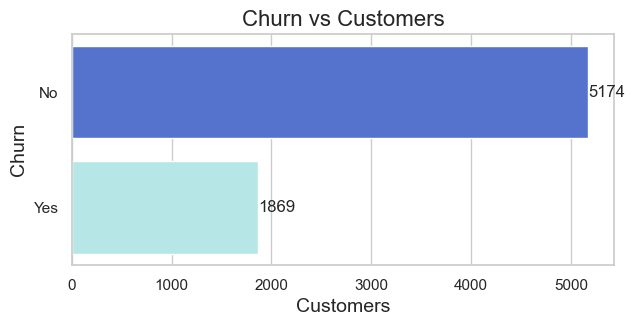

In [10]:
# Set a visual style
sns.set(style="whitegrid")

# Define a custom color palette
palette = sns.color_palette(["#4169E1", "#AFEEEE"])  # Blue for 'No', Light Blue for 'Yes'

# Create the figure and axis
plt.figure(figsize=(7, 3))

# Count the occurrences of each category
churn_counts = data['Churn'].value_counts()

# Create the horizontal bar chart
sns.barplot(x=churn_counts.values, y=churn_counts.index, palette=palette)

# Add titles and labels
plt.title('Churn vs Customers', fontsize=16)
plt.ylabel('Churn', fontsize=14)
plt.xlabel('Customers', fontsize=14)

# Add values on top of each bar
for index, value in enumerate(churn_counts.values):
    plt.text(value, index, str(value), va='center')

# Show the plot
plt.show()

## 3.2. Data vizualization

For the purpose of visualisation and analysis, keep in mind that the variable SeniorCitizen is categorical due to the nature of the data it contains, while the variable TotalCharges is considered numerical due to its characteristics. However, since the variable totalcharges will be treated as numerical, we will first do a more detailed analysis to determine how to proceed with it going forward.

- Numerical variables

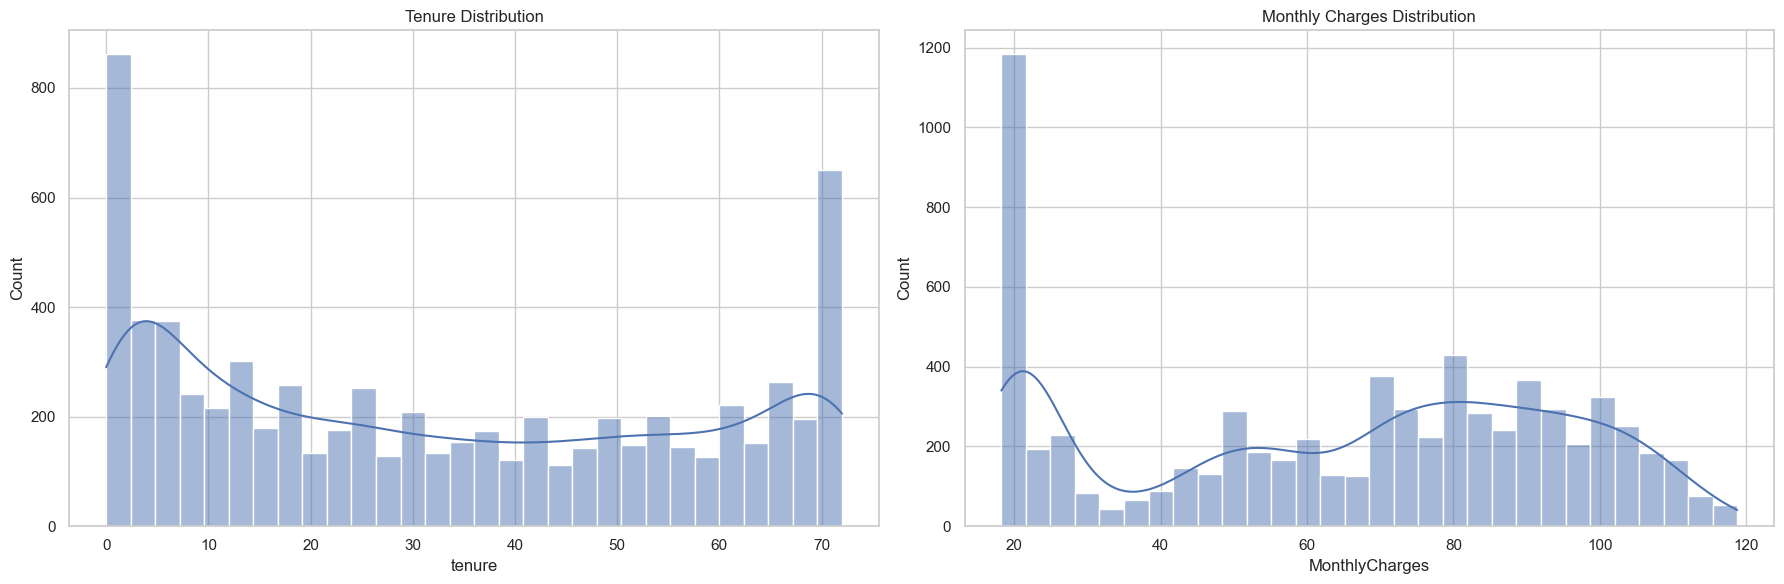

In [11]:
# Creating the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for 'tenure'
sns.histplot(data['tenure'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Tenure Distribution')

# Plot for 'MonthlyCharges'
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution')

plt.tight_layout()
plt.show()

In the upper graph of the variable tenure we observe significant peak values at the extremes of the distribution, which suggests a high concentration of new customers (lower tenure) and long-term customers (higher tenure). The presence of these spots may indicate a behaviour, where customers tend to discontinue services in the first few months or stay with them for an extended period of time.

In the second grph it appears that the distributions is bimodal, suggesting two distinct groups in terms of montly jobs. This coul represent several market segment, such a those who choose basic against premium plans. Additionally, a notable concentration of customers is seen at the lower end of the price scale which may indicate a preference for more economical plans.

- Categorical Variables

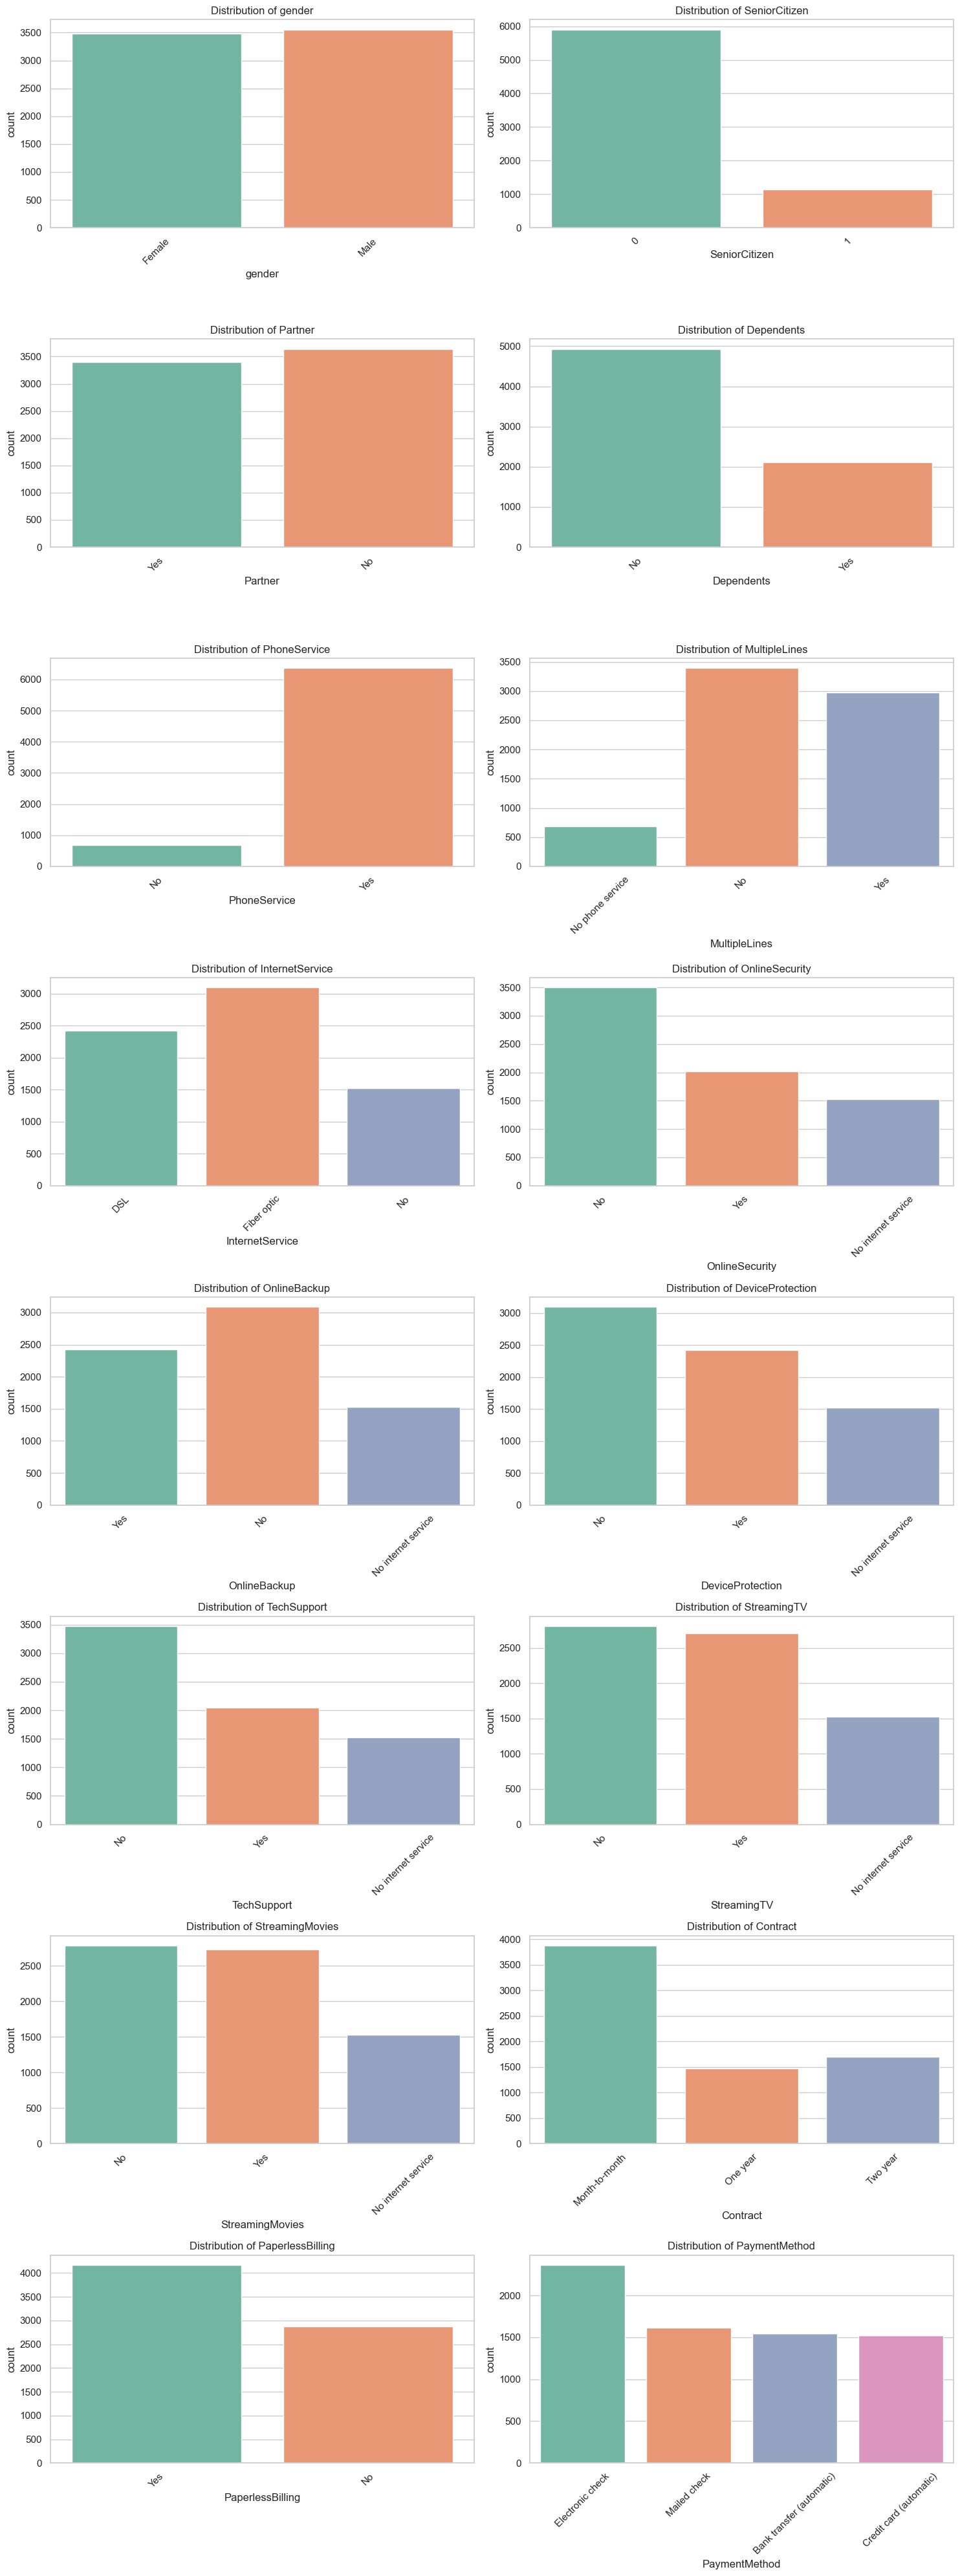

In [12]:

# Configuration for the plots
sns.set(style="whitegrid", palette="pastel")

# List of the new categorical variables
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]

# Determining the number of rows needed for the subplots
n_rows = len(categorical_vars) // 2 + len(categorical_vars) % 2

# Creating a figure with multiple subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 5))

# Iterating through the variables and creating bar charts
for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 2)
    sns.countplot(x=var, data=data, ax=axes[row, col], palette="Set2")
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjustment for when the number of variables is odd (hide last subplot if empty)
if len(categorical_vars) % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

To advance our analysis, we will employ correlation techniques to asses the usefulness and impact of various factors. This will hep us to understand the direct relationships our target variable may have with other features. By doing so, we aim to uncover significant correlations thah could reveal insightful trends and patterns, guiding our predictive modeling and decision-making processes.

# 4. Data Preparation

# 5. Modeling

## 5.1 Train / Test Split